<a href="https://colab.research.google.com/github/Patrick-Setubal/Data_Science_Analytics/blob/main/puc/sprint2/VisaoComputacional/Sprint2_VisaoComputacional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/dipucriodigital/ciencia-de-dados-e-analytics/tree/main/mvp-machine-learning-e-analytics

# Definição do Problema

**Problema de Visão computacional**


**Objetivo:** Criar um Modelo de visão computacional que consiga diferenciar minhas duas cachorras "Maeve" e "Amora".

**Dataset:** Foram tiradas 500 fotos de cada uma delas utilizando um smartphone.

# Coleta dos Dados

In [8]:
# Importações das bibliotecas

# Biblioteca para lidar com os dados
import pandas as pd
import numpy as np
import random
import os
from google.colab import drive
drive.mount('/content/drive')

# Biblioteca para lidar com graficos e imagens
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Biblioteca de Pre-Processamento
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# Bibliotecas de Machine learning
from sklearn.model_selection import train_test_split





Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
# Importanto Imagens da amora e da maeve
path_amora = '/content/drive/MyDrive/Codigos/Pos PUC/Sprint 2/Dataset_Sprint2_VisaoComputacional/Amora Fotos/'
path_maeve = '/content/drive/MyDrive/Codigos/Pos PUC/Sprint 2/Dataset_Sprint2_VisaoComputacional/Maeve Fotos/'
amora_img_name = [path_amora + name for name in os.listdir(path_amora)]
maeve_img_name = [path_maeve + name for name in os.listdir(path_maeve)]

# Criando Dataframe
df_amora = pd.DataFrame({'imagem': amora_img_name, 'class': '1', 'name': 'amora'})
df_maeve = pd.DataFrame({'imagem': maeve_img_name, 'class': '0', 'name': 'maeve'})
df = pd.concat([df_amora, df_maeve],ignore_index=True)

# Análise exploratória de dados

In [27]:
# Visualizando Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   imagem  1000 non-null   object
 1   class   1000 non-null   object
 2   name    1000 non-null   object
dtypes: object(3)
memory usage: 23.6+ KB


Quantidade de Imagens da Amora e da Maeve
amora    500
maeve    500
Name: name, dtype: int64


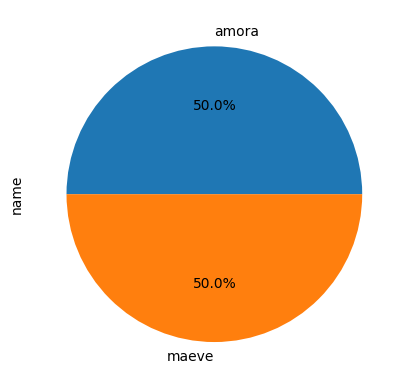

In [ ]:
# Comparar quantidade de fotos da Amora e da Maeve
print('Quantidade de Imagens da Amora e da Maeve')
print((df['name']).value_counts())

# Plotar Grafico de Pizza
df_pie_class = df['name'].value_counts().plot.pie(autopct='%1.1f%%')

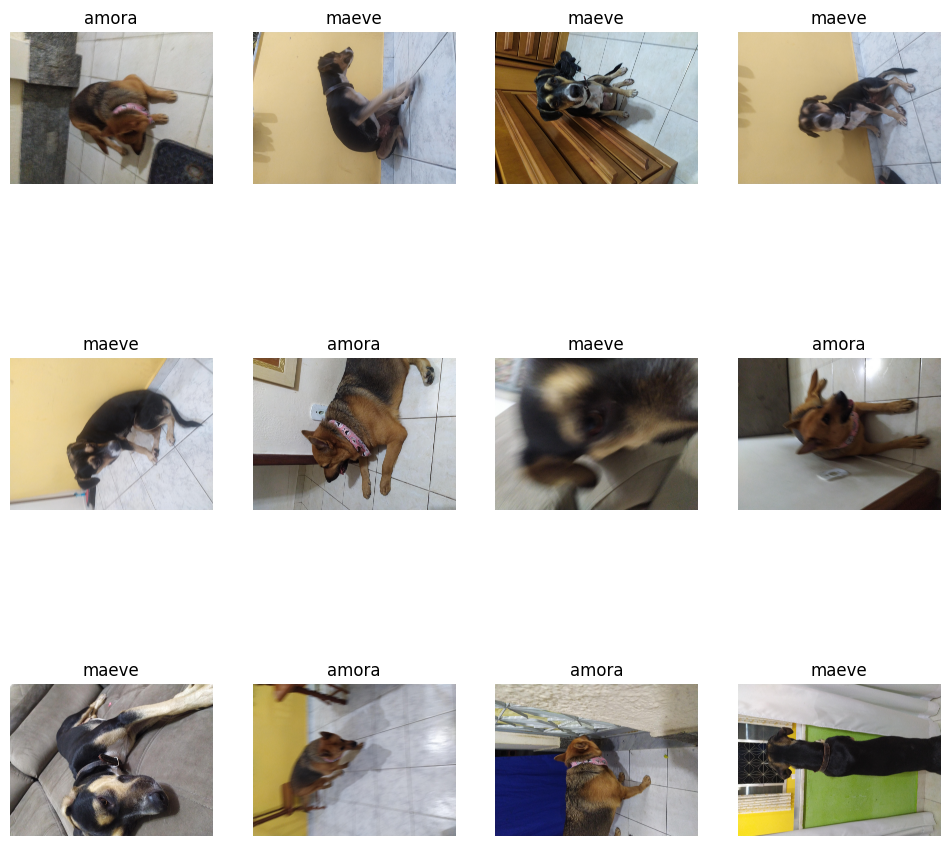

In [7]:
# Exibir 12 imagens do dataset

fig = plt.gcf() # Criar Obj Figura
fig.set_size_inches(3*4, 3*4) # Definir suas proporções

for i in range(12):
  random_index = random.randint(0, len(df['imagem'])-1) # Devinir um index randomicamente
  img_path = df['imagem'].iloc[random_index] # Selecionar este Index no dataset
  sp = plt.subplot(3, 4, i + 1) # Definir posições das imagens
  sp.axis('Off') # Remover Linha dos eixos
  img = mpimg.imread(img_path) # criar a imagem
  plt.imshow(img) # Colocar imagem no grafico
  plt.title(df['name'].iloc[random_index]) # Nomear

plt.show() # Exibir


# Pre-Processamento


In [34]:
# Separando dados de treino e os dados de Teste
train, test = train_test_split(df[['imagem' , 'class', 'name']],
                              test_size=0.3, # definindo porcentagem usado para test
                              random_state=42, # Definindo s Seed
                              shuffle=True) # Definir Dados embaralhados


print(f'Train Dataset com: {len(train)} Linhas')
display(train.head())
print(f'Test Dataset com: {len(test)} Linhas')
display(test.head())

Train Dataset com: 700 Linhas


,imagem,class,name
541,/content/drive/MyDrive/Codigos/Pos PUC/Sprint ...,0,maeve
440,/content/drive/MyDrive/Codigos/Pos PUC/Sprint ...,1,amora
482,/content/drive/MyDrive/Codigos/Pos PUC/Sprint ...,1,amora
422,/content/drive/MyDrive/Codigos/Pos PUC/Sprint ...,1,amora
778,/content/drive/MyDrive/Codigos/Pos PUC/Sprint ...,0,maeve


Test Dataset com: 300 Linhas


,imagem,class,name
521,/content/drive/MyDrive/Codigos/Pos PUC/Sprint ...,0,maeve
737,/content/drive/MyDrive/Codigos/Pos PUC/Sprint ...,0,maeve
740,/content/drive/MyDrive/Codigos/Pos PUC/Sprint ...,0,maeve
660,/content/drive/MyDrive/Codigos/Pos PUC/Sprint ...,0,maeve
411,/content/drive/MyDrive/Codigos/Pos PUC/Sprint ...,1,amora


In [36]:
# Configurando o ImageDataGenerator para o set de treino, Aumentando o dataset e criar o conjunto de validação
train_datagen = ImageDataGenerator(validation_split=0.2, # Criar 20% para Validação
                                  rescale = 1.0/255, # Normalizando os dados do pixel
                                  rotation_range=40, # Definir range de rotação das imagens
                                  shear_range=0.2, # Distorcer forma da imagem
                                  zoom_range=0.2, # Range de zoom
                                  horizontal_flip=True, # Podem ser invertidas horizontalmente
                                  fill_mode='nearest') # preencher pixel criado utilizando os pixeis mais proximos

# Configurando set de treino
test_datagen = ImageDataGenerator(rescale=1./255) # Normalizando os dados do pixel

# Gerando imagens para Treino utilizando a configuração do train_datagen
train_generator = train_datagen.flow_from_dataframe(
    dataframe = train,      # Definir Dataset inteiro
    x_col="imagem",         # Valor de x
    y_col="class",          # Valor de Y
    target_size=(150, 150), #Altura e largura das Imagens
    batch_size=50,          # Numero de imagens geradas por lote
    class_mode="binary",    # Definido dados Binarios 0 ou 1
    subset="training",      # Definindo dados Usados para training
)

# Gerando imagens para Validação utilizando a configuração do train_datagen
val_generator = train_datagen.flow_from_dataframe(
    dataframe = train,      # Definir Dataset inteiro
    x_col="imagem",         # Valor de x
    y_col="class",          # Valor de Y
    target_size=(150, 150), #Altura e largura das Imagens
    batch_size=50,          # Numero de imagens geradas por lote
    class_mode="binary",    # Definido dados Binarios 0 ou 1
    subset="validation",      # Definindo dados Usados para training
)

# Gerando imagens para teste utilizando a configuração do test
test_generator = test_datagen.flow_from_dataframe(
    dataframe = test,       # Definir Dataset inteiro
    x_col="imagem",         # Valor de x
    y_col="class",          # Valor de Y
    target_size=(150,150),  #Altura e largura das Imagens
    batch_size=50,          # Numero de imagens geradas por lote
    class_mode="binary"     # Definido dados Binarios 0 ou 1
)


Found 560 validated image filenames belonging to 2 classes.
Found 140 validated image filenames belonging to 2 classes.
Found 300 validated image filenames belonging to 2 classes.


In [57]:
# Visualizando Exemplo de imagens geradas

# Pegando um registro do dataframe
line = df.iloc[3:4]

# Utilizar configuração do train_datagen para gerar imagens
line_generator = train_datagen.flow_from_dataframe(
    dataframe = line, # Definir Dataset
    x_col="imagem",   # Definir X
    y_col="class",    # Definir X
    target_size=(150,150),  # Definir
    class_mode="categorical"
)
# Gerando imagens para teste utilizando a configuração do test
line_generator = test_datagen.flow_from_dataframe(
    dataframe = line,       # Definir Dataset inteiro
    x_col="imagem",         # Valor de x
    y_col="class",          # Valor de Y
    target_size=(150,150),  #Altura e largura das Imagens
    class_mode="categorical"     # Definido dados Binarios 0 ou 1
)




# plt.figure(figsize=(10, 10))
# for i in range(9):
#     plt.subplot(3, 3, i+1)
#     for x_batch, y_batch in sample_generator:
#         image = x_batch[0]
#         plt.imshow(image)
#         plt.axis("Off")
#         break
# plt.tight_layout()
# plt.show()

A saída de streaming foi truncada nas últimas 5000 linhas.
[[[[0.7807818  0.8043112  0.74940926]
   [0.7851047  0.8086341  0.75373214]
   [0.78942764 0.81295705 0.7580551 ]
   ...
   [0.57074475 0.641333   0.5541563 ]
   [0.54340196 0.6139902  0.5131421 ]
   [0.49408147 0.5646697  0.4752676 ]]

  [[0.79210734 0.8154882  0.7607348 ]
   [0.7879826  0.811512   0.75661004]
   [0.7836597  0.8071891  0.75228715]
   ...
   [0.557004   0.62759227 0.5335452 ]
   [0.5195853  0.59017354 0.49397042]
   [0.4673819  0.5389058  0.4526313 ]]

  [[0.7886932  0.8009157  0.7589231 ]
   [0.78944737 0.80484825 0.7580748 ]
   [0.79088837 0.81061214 0.7595158 ]
   ...
   [0.54326326 0.6138515  0.512934  ]
   [0.4938214  0.5644097  0.47507688]
   [0.4399004  0.51314193 0.42686743]]

  ...

  [[0.45628697 0.29665425 0.12560692]
   [0.45480323 0.30348995 0.11535338]
   [0.47424006 0.31293407 0.10875163]
   ...
   [0.74106055 0.8050742  0.7895039 ]
   [0.7453835  0.8108381  0.7909449 ]
   [0.74924856 0.8154574  

KeyboardInterrupt: ignored

In [ ]:
train, test = train_test_split(df[['imagem' , 'class']] ,test_size=0.3 ,random_state=42 , shuffle=True)

In [ ]:
print("##### Train: #####")
print(train)
print("##### Test: #####")
print(test)

##### Train: #####
                                                imagem  class
541  /content/drive/MyDrive/Codigos/Pos PUC/Sprint ...      0
440  /content/drive/MyDrive/Codigos/Pos PUC/Sprint ...      1
482  /content/drive/MyDrive/Codigos/Pos PUC/Sprint ...      1
422  /content/drive/MyDrive/Codigos/Pos PUC/Sprint ...      1
778  /content/drive/MyDrive/Codigos/Pos PUC/Sprint ...      0
..                                                 ...    ...
106  /content/drive/MyDrive/Codigos/Pos PUC/Sprint ...      1
270  /content/drive/MyDrive/Codigos/Pos PUC/Sprint ...      1
860  /content/drive/MyDrive/Codigos/Pos PUC/Sprint ...      0
435  /content/drive/MyDrive/Codigos/Pos PUC/Sprint ...      1
102  /content/drive/MyDrive/Codigos/Pos PUC/Sprint ...      1

[700 rows x 2 columns]
##### Test: #####
                                                imagem  class
521  /content/drive/MyDrive/Codigos/Pos PUC/Sprint ...      0
737  /content/drive/MyDrive/Codigos/Pos PUC/Sprint ...      0
740  /con

In [ ]:
train_datagen=ImageDataGenerator(validation_split=0.2, #include validation split
                                 rescale = 1.0/255,
                                    rotation_range=40,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')

test_datagen=ImageDataGenerator(rescale=1./255)


train_generator=train_datagen.flow_from_dataframe(
    train ,path,
    target_size=(150,150),
    batch_size=50,
    class_mode='binary',
    x_col='images',
    y_col='class',
    subset='training' #training set
    )

val_generator=train_datagen.flow_from_dataframe(
    train ,path,
    target_size=(150,150),
    batch_size=50,
    class_mode='binary',
    x_col='images',
    y_col='class',
    subset='validation' #validation set
    )

test_generator=test_datagen.flow_from_dataframe(
    test ,path,
    target_size=(150,150),
    batch_size=50,
    class_mode='binary',
    x_col='images',
    y_col='class',)

In [ ]:
# Pegando um registro do dataframe
sample = df.sample(n=1)

# Neste caso o tipo de classe é categorico, pois temos um exemplo com apenas uma classe
sample_generator = train_datagen.flow_from_dataframe(
    sample,
    path,
    x_col='images',
    y_col='class',
    target_size=(150,150),
    class_mode='categorical'
)

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    for x_batch, y_batch in sample_generator:
        image = x_batch[0]
        plt.imshow(image)
        plt.axis('Off')
        break
plt.tight_layout()
plt.show()

In [ ]:
model=models.Sequential()
model.add(layers.Conv2D(32 ,(3,3) , activation='relu' , input_shape=(150,150,3 ) ) )
model.add(layers.MaxPooling2D( (2,2)))

model.add(layers.Conv2D(64 , (3,3) , activation='relu'))
model.add(layers.MaxPooling2D( (2,2)))

model.add(layers.Conv2D(128 , (3,3) , activation='relu'))
model.add(layers.MaxPooling2D( (2,2)))

model.add(layers.Conv2D(128 , (3,3) , activation='relu'))
model.add(layers.MaxPooling2D( (2,2)))

In [ ]:
model.add(layers.Flatten() )
model.add(layers.Dropout(0.25))
model.add(layers.Dense( 512 ,activation='relu' ))
model.add(layers.Dropout(0.25))
model.add(layers.Dense( 1 , activation='sigmoid' ) )

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy' , metrics=['accuracy'])